# Logical Fallacies in Data Science and Statistics

A logical fallacy is an error in reasoning that results in an argument being invalid or unsound. Logical fallacies are often used in arguments to mislead or persuade an audience, rather than providing a valid and logical support for a conclusion. There are many logical fallacies associated with data science studies, although there are many more that are irrelevant. Knowing these fallacies is the best way to avoid falling into them. For this purpose, I will explain some of these fallacies in this post and illustrate them. 

## Cherry Picking Fallacy
The Cherry Picking Fallacy is a type of statistical fallacy in which only a portion of data that supports a particular conclusion is used, while ignoring other data that contradicts it. This results in a biased and inaccurate representation of the information.I can imagine that you’ve heard this fallacy, and even if you haven’t, you instinctively try not to fall for it, but let me make it clearer with a simple code.

In [3]:
# creating data
data = [2, 4, 6, 8, 10, 11, 12, 14, 16, 18, 20] 

# Calculating the average of the data
averagedata = sum(data) / len(data)

# Selectinh only the numbers greater than 10 from the data set
selected_data = [num for num in data if num > 10]

# Calculating the average of the selected numbers
averageselected = sum(selected_data) / len(selected_data)
print("Data: ", data)
print("Average of data: ", averagedata, '\n')
print("Selected data: ", selected_data)
print("Average of selected data: ", averageselected)

Data:  [2, 4, 6, 8, 10, 11, 12, 14, 16, 18, 20]
Average of data:  11.0 

Selected data:  [11, 12, 14, 16, 18, 20]
Average of selected data:  15.166666666666666


In this code, we have a list of numbers called data, which includes both even and odd numbers. The code selects only the numbers greater than 10 from the list using a list comprehension and stores them in a new list called selected_data. The code then calculates the mean of the selected numbers and stores it in a variable called average.

The cherry picking fallacy occurs because we have selectively chosen only the numbers greater than 10 from the data set, while ignoring the numbers that are less than or equal to 10. This can lead to an inaccurate conclusion because we are only looking at a subset of the data, and not considering the whole picture.
Here, the average of the selected numbers is 15.17. However, if we consider all the numbers in the data list, the true average is 11, which means we haven't really gained any additional insight by selectively choosing only the numbers greater than 10. This is an example of the cherry picking fallacy, where we selectively choose data to support our conclusion, while ignoring other relevant data.

This simple example is used to better understand the fallacy. Of course, it is highly unlikely to fall for the fallacy so blatantly. It might be more useful to continue with a real-life example.

Imagine a data scientist wants to prove that a certain advertising campaign was effective in increasing sales. S/he presents data that shows that sales increased in the month immediately following the campaign. However, S/he ignores data from several months prior to the campaign that showed a similar increase in sales, as well as data from several months after the campaign that showed a decrease in sales. This data scientist is committing the cherry picking fallacy by selectively using data that supports their argument and ignoring data that contradicts it. S/he is creating a biased and misleading representation of the data, suggesting that the advertising campaign was solely responsible for the increase in sales, when there may have been other factors at play.

In data science and statistics, it’s important to consider all available data, and to be aware of any biases or selective reasoning that may be present. This can help ensure that conclusions are drawn based on a comprehensive and accurate understanding of the data, rather than on a cherry-picked subset of it. At some point, this also depends on the correct split between train and test. Getting this split wrong can also lead to this fallacy.

## Hasty Generalization

The Hasty Generalization Fallacy is a type of statistical fallacy in which a conclusion is drawn based on insufficient evidence. This occurs when a conclusion is made based on a small sample size or a limited set of data, without considering a representative and diverse range of data. To better understand this fallacy, which reveals the importance of the sampling drawn from the population, you can check the following codes:

In [4]:
import random

# Creating a list of 10,000 random numbers between 0 and 100 which will be our population
population = [random.randint(0, 100) for _ in range(10000)]

# Counting the number of numbers that are greater than 50 which will be our sample
count_greater_than_50 = sum(1 for num in population if num > 50)

# Calculating the percentage of numbers that are greater than 50
percentage_greater_than_50 = count_greater_than_50 / len(data) * 100

if percentage_greater_than_50 > 50:
    print("The majority of the numbers are greater than 50!")
else:
    print("The majority of the numbers are less than or equal to 50.")

The majority of the numbers are greater than 50!


In this code, I created a list of 10,000 random numbers between 0 and 100 using the random.randint() function. I then counted the number of numbers in the list that are greater than 50 using a list comprehension and the sum() function. I calculated the percentage of numbers that are greater than 50 by dividing the count by the length of the list and multiplying by 100.

The hasty generalization fallacy occurs because I am making a broad conclusion about the entire data set based on a small subset of the data (i.e., the numbers that are greater than 50). In reality, we do not have enough information to make such a conclusion about the entire data set. The output suggests that the hasty generalization made in the if statement was incorrect, since the majority of the numbers in the data set are actually less than or equal to 50. The code may have randomly generated a large number of smaller values, leading to a percentage of numbers greater than 50 that is not representative of the entire data set.

This simple example is used to better understand the fallacy. Of course, it is highly unlikely to fall for the fallacy so blatantly. It might be more useful to continue with a real-life example.

Imagine a data scientist wants to prove that a certain type of software is more popular than another. S/he surveys 100 people and finds that 60% prefer the first type of software. Based on this limited sample, the data scientist concludes that the first type of software is more popular. However, this conclusion is based on a small and non-representative sample, and may not accurately reflect the preferences of the entire population.



## Data Dredging Fallacy

The Data Dredging Fallacy, also known as “p-hacking” or “data fishing,” is a statistical fallacy that occurs when data is analyzed in an attempt to find a pattern or relationship, even when there is no actual relationship present. This fallacy is based on the idea that by testing enough variables, you can eventually find a statistically significant relationship by chance alone.

Here is an example of fallacy:

In [25]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import random

# Generating random data for two variables

N = 100
x = np.random.normal(0, 1, N)
y = x + np.random.normal(0, 1, N)

# Creating a data frame with the variables
data = pd.DataFrame({'x': x, 'y': y})

# Fitting a linear regression model using x and y
model = smf.ols("y ~ x", data).fit()

# Generating additional random variables
for i in range(10):
    z = np.random.normal(0, 1, N)
    data['z' + str(i)] = z

# Fittting all possible linear regression models using two variables
best_model = None
best_rsquared = 0
for i in range(2, len(data.columns)):
    for j in range(i + 1, len(data.columns)):
        formula = "{} ~ {}".format(data.columns[j], data.columns[i])
        model = smf.ols(formula, data).fit()
        if model.rsquared > best_rsquared:
            best_model = model
            best_rsquared = model.rsquared

# Printing the best R-squared and conclusion
print("Best R-squared:", best_rsquared)
print("Conclusion: The best model is the one with the highest R-squared.")

Best R-squared: 0.0740056148352436
Conclusion: The best model is the one with the highest R-squared.


In this example, the code generates random data for two variables, x and y, and fits a linear regression model using x and y. The code then generates 10 additional random variables, and fits all possible linear regression models using two variables. The conclusion is that the best model is the one with the highest R-squared.

However, this conclusion is incorrect, as the highest R-squared may simply be due to chance, and not due to a real relationship between the variables. This is the Data Dredging Fallacy. To avoid this fallacy, it’s important to use appropriate methods to avoid overfitting, such as cross-validation or using a model selection criterion like the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC), and CP. Additionally, the code would need to seek out additional data to confirm or refute the conclusion, and seek out independent review to ensure that the conclusion is based on a comprehensive and accurate understanding of the data.

## Post Hoc Fallacy

The post hoc fallacy is a common logical error that arises when individuals assume that just because one event follows another, it must have been caused by it. This fallacy is particularly problematic when it comes to statistical analysis because it can lead to incorrect conclusions about causality based on correlation alone. In order to avoid this fallacy, it is important to carefully consider all possible confounding factors that could be influencing the relationship between two variables.

In Python, we can demonstrate the post hoc fallacy using a simple example. Let's say we are analyzing a dataset that includes information on the amount of ice cream sold in a city on a given day, as well as the number of crimes committed in the same city on that same day. We might find that there is a strong positive correlation between these two variables, meaning that on days when more ice cream is sold, there tend to be more crimes committed.

However, just because these two variables are correlated, it doesn't necessarily mean that one is causing the other. There could be a number of other factors at play, such as the weather or the time of year, that are actually driving both of these trends. Therefore, we would need to conduct further analysis and consider other variables in order to determine whether there is a true causal relationship between ice cream sales and crime rates.

To simulate this in Python, we can create a scatterplot of the ice cream sales and crime rates data, and calculate the correlation coefficient between the two variables. However, we must keep in mind that correlation does not necessarily imply causation, and we should be cautious about drawing any firm conclusions based on this analysis alone. Here is some sample code to illustrate this:

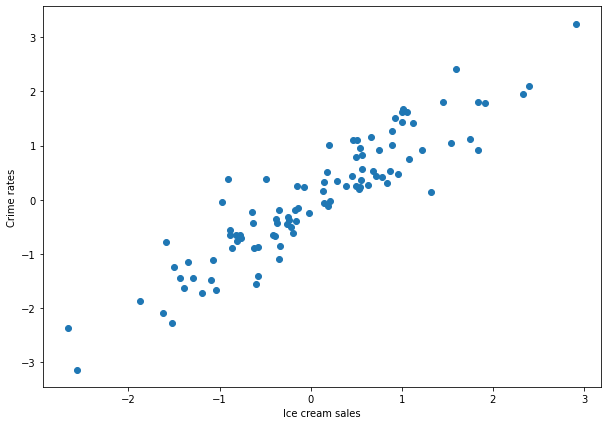

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# generating some random data

n = 100
ice_cream_sales = np.random.normal(0, 1, 100)
crime_rates = ice_cream_sales + np.random.normal(0, 0.5, 100)

# creating a pandas dataframe
df = pd.DataFrame({"Ice cream sales": ice_cream_sales,
                   "Crime rates": crime_rates})

# plotting the data
plt.figure(figsize=(10,7)) # setting figure size
plt.scatter(df["Ice cream sales"], df['Crime rates']) # scatterplot
plt.xlabel("Ice cream sales") # x axis name
plt.ylabel("Crime rates") # y axis name
plt.show()


As we can see, there is a positive correlation between ice cream sales and crime rates in this dataset. However, this does not necessarily mean that ice cream sales are causing crime rates to increase. It is important to consider other potential factors and conduct further analysis before drawing any firm conclusions.

In [108]:
corr = df["Ice cream sales"].corr(df["Crime rates"])
corr

0.9204577717579113

## Survivorship Bias

urvivorship Bias Fallacy refers to the tendency to concentrate on the things that made it past some selection process and neglect those that did not, typically due to their lack of visibility. In the context of data science or statistics, this can happen when focusing only on successful examples or data points, while ignoring the failures or omitted data.

One example of survivorship bias in data science or statistics is when a company only focuses on analyzing the successful customer case studies to improve their business. They might use these case studies to draw conclusions about what works for their customers and make changes accordingly. However, by only focusing on the successful customers, they are ignoring the larger population of customers who did not succeed and the reasons why they did not. As a result, their analysis may not accurately reflect the entire customer population and they may miss important factors that contribute to customer success or failure.

For example, a company might look at a set of customers who made a large purchase and remained loyal to the company for several years. Based on this analysis, the company might conclude that offering discounts is the key to retaining customers. However, they might be ignoring a larger group of customers who did not receive discounts and still made large purchases and remained loyal. By only considering the successful customers, the company might be drawing incorrect conclusions about their customer base and their purchasing behavior.

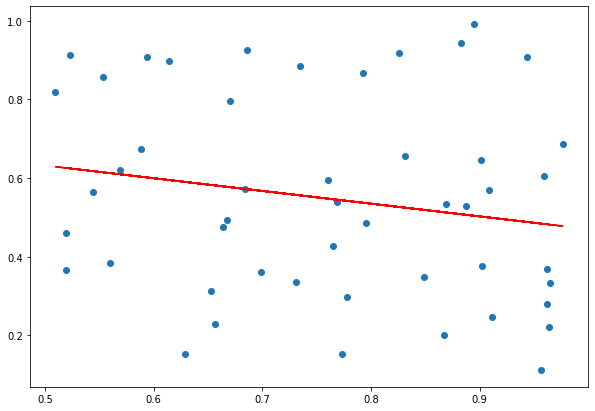

In [27]:

import matplotlib.pyplot as plt
import numpy as np
# Generating random data
np.random.seed(1234555677)
N = 100
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)

# Filtering the data
mask = x > 0.5
x = x[mask]
y = y[mask]

# Plotting the data
plt.figure(figsize=(10,7))
plt.scatter(x, y)

# Fit a line to the data
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x + b, '-r')
plt.show()

In this example, the code generates random data for two variables, x and y, and fits a line to the data that passes a specific filter (x > 0.5). The conclusion is that the line is a good fit for the filtered data. However, this conclusion is based on a Survivorship Bias, as it only focuses on the data that passed the filter, while ignoring the omitted data.

## Cobra Effect Fallacy

The Cobra Effect is a term used to describe a situation where an intended solution to a problem actually makes the problem worse. This can occur when the solution is based on incorrect assumptions or incomplete information. In the context of data science and statistics, the Cobra Effect can occur when a decision is made based on flawed or incomplete data, leading to unintended consequences. 

Assume a government wants to reduce the number of cobras in a certain area, so they offer a reward for each cobra that is killed. As a result, people begin to breed cobras in order to receive the reward. This results in an increase in the number of cobras, making the problem worse instead of better.

Lets simulate this fallacy:

In [136]:
import random

cobras = 100
reward = 10
cobras_killed = 0

for i in range(10):
    cobras_killed = cobras * 0.1
    cobras = cobras + cobras_killed
    reward = reward * 1.05
    if cobras_killed > 0:
        print(f"{cobras_killed} cobras were killed, increasing the population to {cobras} and the reward to {reward}")
    else:
        print(f"No cobras were killed, leaving the population at {cobras} and the reward at {reward}")


10.0 cobras were killed, increasing the population to 110.0 and the reward to 10.5
11.0 cobras were killed, increasing the population to 121.0 and the reward to 11.025
12.100000000000001 cobras were killed, increasing the population to 133.1 and the reward to 11.576250000000002
13.31 cobras were killed, increasing the population to 146.41 and the reward to 12.155062500000001
14.641 cobras were killed, increasing the population to 161.051 and the reward to 12.762815625000002
16.1051 cobras were killed, increasing the population to 177.15609999999998 and the reward to 13.400956406250003
17.715609999999998 cobras were killed, increasing the population to 194.87170999999998 and the reward to 14.071004226562504
19.487171 cobras were killed, increasing the population to 214.35888099999997 and the reward to 14.77455443789063
21.4358881 cobras were killed, increasing the population to 235.79476909999997 and the reward to 15.513282159785163
23.579476909999997 cobras were killed, increasing the 

In this code chunk, we assume that some people start breeding cobras in addition to catching and killing them. We randomly generate a number between 0 and the number of cobras killed in each iteration, and add that number to the population. We then subtract the number of bred cobras from the total population. As we can see from the output, the cobra population starts to increase after a few iterations, demonstrating the cobra effect.

## Gambler's Fallacy
Gambler's Fallacy is a type of logical fallacy that occurs when someone assumes that a random event is influenced by previous events. In other words, it's the belief that if a certain event has happened frequently in the past, it's less likely to happen in the future or vice versa. This is incorrect as each event in a random process is independent of previous events and has the same probability of happening regardless of the past outcomes.

In [137]:
import random

#Simulating coin flip
def coin_flip():
    return random.choice(['heads', 'tails'])

#Simulating 100 coin flips
results = [coin_flip() for i in range(100)]

#Checking for streaks of heads or tails
head_streaks = 0
tail_streaks = 0
current_streak = 0
previous_result = None

for result in results:
    if result == 'heads':
        if previous_result == 'heads':
            current_streak += 1
        else:
            if current_streak > head_streaks:
                head_streaks = current_streak
            current_streak = 1
    else:
        if previous_result == 'tails':
            current_streak += 1
        else:
            if current_streak > tail_streaks:
                tail_streaks = current_streak
            current_streak = 1
    previous_result = result

#Printing the longest streak of heads or tails
print(f"Longest streak of heads: {head_streaks}")
print(f"Longest streak of tails: {tail_streaks}")

Longest streak of heads: 5
Longest streak of tails: 4


The output of this code will demonstrate that even though there may be streaks of heads or tails, they have no effect on the outcome of future coin flips and each flip is an independent event with a 50–50 chance of coming up heads or tails.

## Simpson's Paradox

Simpson's Paradox is a phenomenon in statistics where a trend that appears in several different groups of data may disappear or reverse when the groups are combined. This can occur when the relationship between two variables is not the same in all groups and is instead dependent on other factors.

Assume that a data scientist analyzing data from a clinical trial to determine the effectiveness of a new drug. The data may show that the drug is effective in treating a certain condition in one group of patients, but when the data is combined with another group of patients, the overall trend appears to be that the drug is not effective. 
This can occur because the relationship between the drug and the condition may depend on other factors such as age, gender, or lifestyle habits.

To demonstrate Simpson's Paradox with a python code, we can create a simulated dataset with two groups of data and two variables. For example, we can create a dataset with two groups of people with different ages and see how the relationship between their height and weight changes as the age group changes.

In [177]:
import pandas as pd
import numpy as np



ages = [20, 30]
weights = []
heights = []

for age in ages:
    weight = np.random.normal(loc=65, scale=5, size=100)
    height = np.random.normal(loc=170, scale=5, size=100) + (age-25)*2
    weights.append(weight)
    heights.append(height)

data = pd.DataFrame({'Age': np.concatenate([np.repeat(age, 100) for age in ages]),
                     'Weight': np.concatenate(weights),
                     'Height': np.concatenate(heights)})

grouped_data = data.groupby('Age')

print(grouped_data.corr())
data['Height'].corr(data['Weight'])

              Weight    Height
Age                           
20  Weight  1.000000  0.043528
    Height  0.043528  1.000000
30  Weight  1.000000 -0.239362
    Height -0.239362  1.000000


-0.02843799245301172

In this example, when we look at the correlation between height and weight for each age group, we might see a positive correlation in the 20 year old group and a negative correlation in the 30 year old group. However, when we look at the combined data, the overall correlation appears to be neutral or weak.